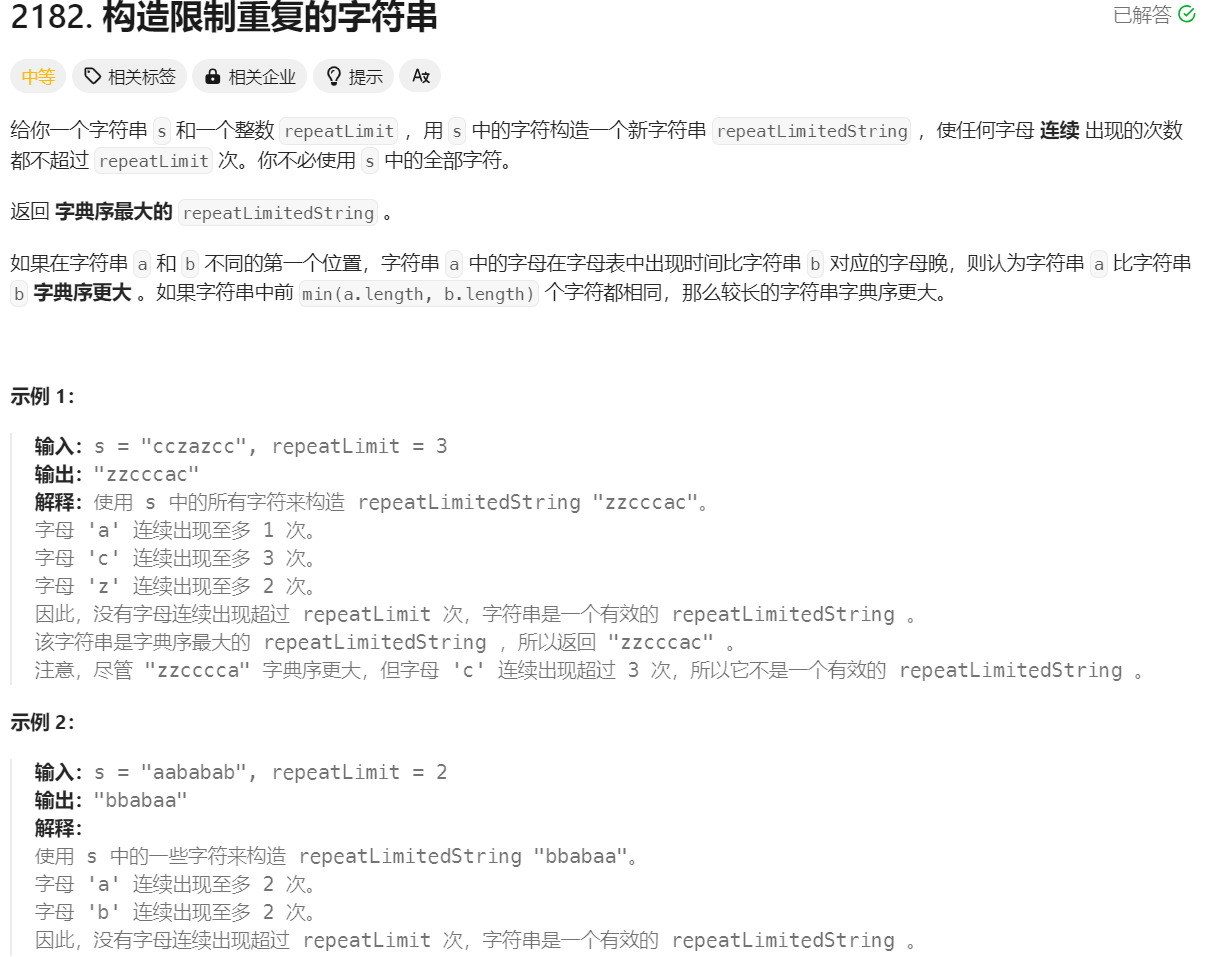

思路：贪心+散列表+双指针  
贪心：先输出最大的字符(c)，输出次数超过限制输出一次第二大的c，然后继续输出最大字符  
散列表：根据index存储对应c出现的次数 如hash_count[0] = 2 代表'a'出现了2次  
双指针：i指向最大的字符所在index，j指向第二大字符所在index  

情况一：最大的字符已经填完；那么就重置m（标记输出了几次），index-1  
情况二：最大的字符没填完，且m没超过限制，那么m+1，输出一个最大字符，即  
情况三：字符没填完，但是超限制了，寻找第二大字符所在的index，然后输出第二大字符，然后重置m  
        即hash_count[i] != 0 and m == limit and j < i and hash_count[j] != 0 

In [1]:
class Solution:
    def repeatLimitedString(self, s: str, repeatLimit: int) -> str:
        N = 26
        hash_count = [0] * N
        for c in s: #构造哈希表
            hash_count[ord(c) - ord('a')] += 1
        result = [] # 存储结果
        i, j, m = N - 1, N - 2, 0 #i指向最大的字符 j指向第二大的字符
        while i >= 0 and j >= 0:
            if hash_count[i] == 0: # 当前字符已经填完，填入后面的字符，重置 m
                m, i = 0, i - 1
            elif m < repeatLimit: # 没填完 且 当前字符未超过限制
                hash_count[i] -= 1
                result.append(chr(ord('a') + i))
                m += 1
            elif j >= i or hash_count[j] == 0: # 寻找第二大字符所在的index
                j -= 1
            else: # count[i]!=0 and  m == limit and j < i and hash_count[j] != 0 当前字符超限制了 填入第二大的字符，并且重置 m
                hash_count[j] -= 1
                result.append(chr(ord('a') + j))
                m = 0
        return ''.join(result)

In [2]:
S = Solution()
s = "cczazcc"
repeatLimit = 3
S.repeatLimitedString(s,repeatLimit)

'zzcccac'